In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
import requests,json

In [2]:
import gc
gc.enable()

### 1. Load Dataset

In [3]:
df=pd.read_csv("loan_2016.csv")

/Users/xrli/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (39,71,104) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(434415, 108)

In [5]:
df.head(5)

,inqlast12m,earliestcrline,secappficorangehigh,numactvrevtl,totcurbal,maxbalbc,mosinoldrevtlop,annualincjoint,term,verificationstatus,...,delinqamnt,emplength,numrevtlbalgt0,numiltl,totalbclimit,ficorangehigh,verificationstatusjoint,totalacc,issued,loanstatus
0,2.0,Mar-2002,NaN,4.0,221036.0,3381.0,168.0,NaN,36 months,Verified,...,0.0,6 years,4.0,7.0,7900.0,669.0,NaN,16.0,Mar-2016,Fully Paid
1,2.0,Nov-1999,NaN,5.0,52953.0,3789.0,196.0,NaN,36 months,Source Verified,...,0.0,9 years,5.0,3.0,15900.0,669.0,NaN,13.0,Mar-2016,Fully Paid
2,2.0,Jan-2005,NaN,3.0,62125.0,854.0,84.0,NaN,36 months,Source Verified,...,0.0,5 years,3.0,4.0,22000.0,739.0,NaN,8.0,Mar-2016,Fully Paid
3,2.0,Aug-1995,NaN,8.0,11565.0,4350.0,247.0,NaN,60 months,Not Verified,...,0.0,10+ years,8.0,3.0,17000.0,674.0,NaN,24.0,Mar-2016,Charged Off
4,1.0,Nov-1996,NaN,13.0,310728.0,6819.0,232.0,NaN,60 months,Verified,...,0.0,10+ years,10.0,4.0,51500.0,679.0,NaN,26.0,Mar-2016,Fully Paid


In [6]:
df.dtypes

inqlast12m                 float64
earliestcrline              object
secappficorangehigh        float64
numactvrevtl               float64
totcurbal                  float64
                            ...   
ficorangehigh              float64
verificationstatusjoint     object
totalacc                   float64
issued                      object
loanstatus                  object
Length: 108, dtype: object

### 2. Prepare Data

### 1.1 Select features

In [7]:
df=df.dropna(axis='columns',how='all')

In [8]:
cols=df.columns.values
cols

array(['inqlast12m', 'earliestcrline', 'numactvrevtl', 'totcurbal',
       'maxbalbc', 'mosinoldrevtlop', 'annualincjoint', 'term',
       'verificationstatus', 'mthssincercntil', 'revolbal',
       'accopenpast24mths', 'percentbcgt75', 'mthssincerecentrevoldelinq',
       'numbctl', 'mosinrcntrevtlop', 'numacctsever120pd',
       'mthssincelastdelinq', 'installment', 'mthssincerecentbc',
       'totcollamt', 'addrstate', 'numsats', 'mthssincelastmajorderog',
       'totalilhighcreditlimit', 'subgrade', 'inqfi', 'openactil',
       'mthssincelastrecord', 'applicationtype', 'intrate',
       'homeownership', 'revolutil', 'emptitle', 'mortacc', 'desc', 'dti',
       'openil12m', 'purpose', 'openacc', 'numbcsats', 'numoprevtl',
       'mosinrcnttl', 'openrv24m', 'openacc6m', 'totalbalil', 'totalcutl',
       'totalbalexmort', 'bcutil', 'grade', 'ilutil', 'delinq2yrs',
       'numtl30dpd', 'pcttlnvrdlq', 'mthssincerecentinq',
       'numtloppast12m', 'loanamnt', 'collections12mthsexmed', '

In [9]:
num_feature=[]
obj_feature=[]
for col in cols:
    if df[col].dtype == 'object':
        obj_feature.append(col)
    else:
        num_feature.append(col)

In [10]:
print (len(num_feature))
sorted(num_feature)

74


['accnowdelinq',
 'accopenpast24mths',
 'allutil',
 'annualinc',
 'annualincjoint',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'ficorangehigh',
 'ficorangelow',
 'fundedamnt',
 'ilutil',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'loanamnt',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast12m',
 'openacc',
 'openacc6m',
 'openactil',
 'openil12m',
 'openil24m',
 'openrv12m',
 'openrv24m',
 'pcttlnvrdlq',
 'p

In [11]:
print (len(obj_feature))
sorted(obj_feature)

20


['addrstate',
 'applicationtype',
 'desc',
 'earliestcrline',
 'emplength',
 'emptitle',
 'grade',
 'homeownership',
 'id',
 'initialliststatus',
 'intrate',
 'issued',
 'loanstatus',
 'purpose',
 'revolutil',
 'subgrade',
 'term',
 'verificationstatus',
 'verificationstatusjoint',
 'zipcode']

#### remove fundedamnt & 'desc'

In [12]:
num_feature.remove('fundedamnt')

In [13]:
obj_feature.remove('desc')
print (len(obj_feature))
obj_feature

19


['earliestcrline',
 'term',
 'verificationstatus',
 'addrstate',
 'subgrade',
 'applicationtype',
 'intrate',
 'homeownership',
 'revolutil',
 'emptitle',
 'purpose',
 'grade',
 'zipcode',
 'id',
 'initialliststatus',
 'emplength',
 'verificationstatusjoint',
 'issued',
 'loanstatus']

#### 'id','loanstatus','issued'

In [14]:
to_remove=[13,17,18]
#'id','issued', 'loanstatus'

In [15]:
obj_feature=np.delete(obj_feature,to_remove).tolist()
print (len(obj_feature))
sorted(obj_feature)

16


['addrstate',
 'applicationtype',
 'earliestcrline',
 'emplength',
 'emptitle',
 'grade',
 'homeownership',
 'initialliststatus',
 'intrate',
 'purpose',
 'revolutil',
 'subgrade',
 'term',
 'verificationstatus',
 'verificationstatusjoint',
 'zipcode']

#### all_feature

In [16]:
all_feature=obj_feature+num_feature
print (len(all_feature))
sorted(all_feature)

89


['accnowdelinq',
 'accopenpast24mths',
 'addrstate',
 'allutil',
 'annualinc',
 'annualincjoint',
 'applicationtype',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'earliestcrline',
 'emplength',
 'emptitle',
 'ficorangehigh',
 'ficorangelow',
 'grade',
 'homeownership',
 'ilutil',
 'initialliststatus',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'intrate',
 'loanamnt',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtl

In [17]:
df=df[all_feature+['id','issued','loanstatus']]
df.head()

,earliestcrline,term,verificationstatus,addrstate,subgrade,applicationtype,intrate,homeownership,revolutil,emptitle,...,tothicredlim,delinqamnt,numrevtlbalgt0,numiltl,totalbclimit,ficorangehigh,totalacc,id,issued,loanstatus
0,Mar-2002,36 months,Verified,FL,C1,Individual,11.99%,MORTGAGE,79.1%,LOGISTICS COORDINATOR,...,235600.0,0.0,4.0,7.0,7900.0,669.0,16.0,75710736,Mar-2016,Fully Paid
1,Nov-1999,36 months,Source Verified,CA,C5,Individual,15.31%,RENT,73.7%,Senior Case Assistant,...,58425.0,0.0,5.0,3.0,15900.0,669.0,13.0,76143686,Mar-2016,Fully Paid
2,Jan-2005,36 months,Source Verified,CA,B4,Individual,10.75%,RENT,8%,Vp,...,78840.0,0.0,3.0,4.0,22000.0,739.0,8.0,76143234,Mar-2016,Fully Paid
3,Aug-1995,60 months,Not Verified,NJ,C2,Individual,12.99%,RENT,37.1%,Administration,...,58967.0,0.0,8.0,3.0,17000.0,674.0,24.0,76022756,Mar-2016,Charged Off
4,Nov-1996,60 months,Verified,IL,D3,Individual,18.25%,MORTGAGE,63%,Electrician,...,355711.0,0.0,10.0,4.0,51500.0,679.0,26.0,76143291,Mar-2016,Fully Paid


In [18]:
df.shape

(434415, 92)

### 1.2 Select rows

#### only keep 36 months (term)

In [19]:
df.term.value_counts()

 36 months    323495
 60 months    110912
Name: term, dtype: int64

In [20]:
df=df.query("term== ' 36 months' ")
df.shape

(323495, 92)

#### only keep fully paid=0, charged off=1 and map

In [21]:
df.loanstatus.value_counts()

Fully Paid            239220
Charged Off            49618
Current                32451
Late (31-120 days)      1312
In Grace Period          598
Late (16-30 days)        292
Default                    4
Name: loanstatus, dtype: int64

In [22]:
df=df.query("loanstatus== 'Fully Paid' or loanstatus== 'Charged Off' ")
df.shape

(288838, 92)

In [23]:
df.loanstatus=df.loanstatus.map({"Fully Paid":0,"Charged Off":1})
df.loanstatus.value_counts()

0    239220
1     49618
Name: loanstatus, dtype: int64

In [24]:
df.loanstatus.value_counts(normalize=True)

0    0.828215
1    0.171785
Name: loanstatus, dtype: float64

In [25]:
obj_feature.remove('term')
print (len(obj_feature))
sorted(obj_feature)

15


['addrstate',
 'applicationtype',
 'earliestcrline',
 'emplength',
 'emptitle',
 'grade',
 'homeownership',
 'initialliststatus',
 'intrate',
 'purpose',
 'revolutil',
 'subgrade',
 'verificationstatus',
 'verificationstatusjoint',
 'zipcode']

In [26]:
print (len(num_feature))
sorted(num_feature)

73


['accnowdelinq',
 'accopenpast24mths',
 'allutil',
 'annualinc',
 'annualincjoint',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'ficorangehigh',
 'ficorangelow',
 'ilutil',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'loanamnt',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast12m',
 'openacc',
 'openacc6m',
 'openactil',
 'openil12m',
 'openil24m',
 'openrv12m',
 'openrv24m',
 'pcttlnvrdlq',
 'percentbcgt75',


In [27]:
all_feature=obj_feature+num_feature
print (len(all_feature))
sorted(all_feature)

88


['accnowdelinq',
 'accopenpast24mths',
 'addrstate',
 'allutil',
 'annualinc',
 'annualincjoint',
 'applicationtype',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'earliestcrline',
 'emplength',
 'emptitle',
 'ficorangehigh',
 'ficorangelow',
 'grade',
 'homeownership',
 'ilutil',
 'initialliststatus',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'intrate',
 'loanamnt',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtl

### 1.3 Train/Test Split - "Issued"

In [28]:
df.issued.head()

0    Mar-2016
1    Mar-2016
2    Mar-2016
5    Mar-2016
7    Mar-2016
Name: issued, dtype: object

In [29]:
df.issued.value_counts()

Mar-2016    44790
Feb-2016    28606
Apr-2016    28062
Aug-2016    24983
Jul-2016    24916
Jun-2016    24471
Jan-2016    22671
May-2016    21760
Dec-2016    18210
Nov-2016    17499
Oct-2016    17409
Sep-2016    15461
Name: issued, dtype: int64

In [30]:
df['train_flag']=df.issued.apply(lambda x:0 if x in ['Oct-2016','Nov-2016','Dec-2016'] else 1)
df.train_flag.value_counts()
#1 train: Jan-Sep, 0 test: Oct-Dec

1    235720
0     53118
Name: train_flag, dtype: int64

### 3. Feature Engineering

### 3.1 Obj to numeric features

#### a) datetime to numeric

In [31]:
#month to Dec 2016
cl_month=df.earliestcrline.apply(lambda x:x.split('-')[0])
cl_year=df.earliestcrline.apply(lambda x:x.split('-')[1])

In [32]:
cl_month.unique()

array(['Mar', 'Nov', 'Jan', 'May', 'Oct', 'Sep', 'Feb', 'Jul', 'Jun',
       'Dec', 'Aug', 'Apr'], dtype=object)

In [33]:
cl_year.unique()

array(['2002', '1999', '2005', '2004', '2008', '1997', '1993', '1998',
       '2012', '1990', '2006', '1972', '2007', '1996', '1994', '1987',
       '2001', '2011', '2000', '1995', '2009', '1986', '1982', '1976',
       '2003', '1989', '2010', '1991', '1984', '1983', '1992', '1975',
       '1988', '1981', '1985', '1963', '1980', '2013', '1978', '1973',
       '1969', '1979', '1974', '1977', '1970', '1971', '1966', '1967',
       '1968', '1955', '1965', '1960', '1957', '1961', '1964', '1958',
       '1959', '1962', '1956', '1948', '1952', '1933', '1954', '1946',
       '1951'], dtype=object)

In [34]:
dic_month={
    'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
    'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11,'Dec':12
}

In [35]:
df['earliestcrline_month']=df.earliestcrline.apply(lambda x: (2016-int(x.split('-')[1]))*12+
                                                   dic_month[x.split('-')[0]])

In [36]:
df.earliestcrline_month.head()

0    171
1    215
2    133
5    149
7    106
Name: earliestcrline_month, dtype: int64

In [37]:
num_feature.append('earliestcrline_month')
obj_feature.remove('earliestcrline')

#### b) emplength to numeric

In [38]:
df.emplength.unique()

array(['6 years', '9 years', '5 years', '10+ years', '3 years', '2 years',
       '< 1 year', '4 years', '8 years', '1 year', nan, '7 years'],
      dtype=object)

In [39]:
df.emplength=df.emplength.map({"< 1 year":0,
                               "1 year":1, "2 years":2, "3 years":3, "4 years":4, "5 years":5,
                               "6 years":6, "7 years":7, "8 years":8, "9 years":9, "10+ years":10})

In [40]:
df.emplength.value_counts()

10.0    94905
2.0     27038
3.0     23727
0.0     22254
1.0     19982
5.0     17717
4.0     17286
6.0     12405
8.0     12383
9.0     11029
7.0      9309
Name: emplength, dtype: int64

In [41]:
num_feature.append('emplength')
obj_feature.remove('emplength')

#### c) % to numeric: intrate, revolutil

In [42]:
df.intrate.head()

0     11.99%
1     15.31%
2     10.75%
5     12.99%
7      7.39%
Name: intrate, dtype: object

In [43]:
df.intrate=df.intrate.apply(lambda x: float(x.replace('%','')))

In [44]:
df.intrate.head()

0    11.99
1    15.31
2    10.75
5    12.99
7     7.39
Name: intrate, dtype: float64

In [45]:
df.revolutil.head()

0    79.1%
1    73.7%
2       8%
5    65.3%
7    23.6%
Name: revolutil, dtype: object

In [46]:
df.revolutil=df.revolutil.apply(lambda x: str(x).replace('%','')).astype(float)

In [47]:
df.revolutil.head()

0    79.1
1    73.7
2     8.0
5    65.3
7    23.6
Name: revolutil, dtype: float64

In [48]:
num_feature.append('intrate')
num_feature.append('revolutil')
obj_feature.remove('intrate')
obj_feature.remove('revolutil')

### 3.2 Ordinal encoding: grade,subgrade

In [49]:
df.grade.unique()

array(['C', 'B', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [50]:
dic_grade={'A':1, 'B':2, 'C':3,
           'D':4, 'E':5, 'F':6, 'G':7
}
df.grade=df.grade.map(dic_grade)

In [51]:
df.grade.value_counts()

2    101466
3     81495
1     60823
4     32999
5      9285
6      2255
7       515
Name: grade, dtype: int64

In [52]:
df.subgrade.unique()

array(['C1', 'C5', 'B4', 'C2', 'A4', 'D3', 'C4', 'D2', 'A3', 'B1', 'B2',
       'A2', 'D1', 'C3', 'B3', 'A1', 'E2', 'B5', 'A5', 'E5', 'D4', 'F1',
       'D5', 'G3', 'F2', 'G2', 'E3', 'G5', 'E4', 'F5', 'E1', 'F3', 'G4',
       'F4', 'G1'], dtype=object)

In [53]:
df.subgrade.head()

0    C1
1    C5
2    B4
5    C2
7    A4
Name: subgrade, dtype: object

In [54]:
df.subgrade=df.subgrade.apply(lambda x: (dic_grade[x[0]] - 1) * 5 + int(x[1]))

In [55]:
df.subgrade.head()

0    11
1    15
2     9
5    12
7     4
Name: subgrade, dtype: int64

In [56]:
num_feature.append('grade')
num_feature.append('subgrade')
obj_feature.remove('grade')
obj_feature.remove('subgrade')

### 3.3 Frequency Encoding: zipcode/addrstate/emptitle

#### a) zipcode

In [57]:
sorted(df.columns)

['accnowdelinq',
 'accopenpast24mths',
 'addrstate',
 'allutil',
 'annualinc',
 'annualincjoint',
 'applicationtype',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'earliestcrline',
 'earliestcrline_month',
 'emplength',
 'emptitle',
 'ficorangehigh',
 'ficorangelow',
 'grade',
 'homeownership',
 'id',
 'ilutil',
 'initialliststatus',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'intrate',
 'issued',
 'loanamnt',
 'loanstatus',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 

In [58]:
df.zipcode.unique()[:5]

array(['330xx', '945xx', '917xx', '498xx', '976xx'], dtype=object)

In [59]:
df.zipcode=df.zipcode.apply(lambda x: int(x[:3]))

In [60]:
df.zipcode.unique()[:5]

array([330, 945, 917, 498, 976])

In [61]:
zipcode_freq=df.groupby('zipcode').size().reset_index()
zipcode_freq.columns=['zipcode','zipcode_freq']
zipcode_freq.head()

,zipcode,zipcode_freq
0,8,2
1,9,1
2,10,447
3,11,154
4,12,103


In [62]:
df=pd.merge(df, zipcode_freq, how='left', on='zipcode')

In [63]:
df.zipcode_freq[:5]

0    2325
1    3041
2    2010
3      97
4    2325
Name: zipcode_freq, dtype: int64

In [64]:
df.head()

,earliestcrline,term,verificationstatus,addrstate,subgrade,applicationtype,intrate,homeownership,revolutil,emptitle,...,numiltl,totalbclimit,ficorangehigh,totalacc,id,issued,loanstatus,train_flag,earliestcrline_month,zipcode_freq
0,Mar-2002,36 months,Verified,FL,11,Individual,11.99,MORTGAGE,79.1,LOGISTICS COORDINATOR,...,7.0,7900.0,669.0,16.0,75710736,Mar-2016,0,1,171,2325
1,Nov-1999,36 months,Source Verified,CA,15,Individual,15.31,RENT,73.7,Senior Case Assistant,...,3.0,15900.0,669.0,13.0,76143686,Mar-2016,0,1,215,3041
2,Jan-2005,36 months,Source Verified,CA,9,Individual,10.75,RENT,8.0,Vp,...,4.0,22000.0,739.0,8.0,76143234,Mar-2016,0,1,133,2010
3,May-2004,36 months,Verified,MI,12,Individual,12.99,MORTGAGE,65.3,Jail Administrator,...,19.0,18000.0,679.0,36.0,75943579,Mar-2016,0,1,149,97
4,Oct-2008,36 months,Source Verified,FL,4,Individual,7.39,MORTGAGE,23.6,Telecom ngineer,...,8.0,9400.0,729.0,18.0,75169662,Mar-2016,0,1,106,2325


In [65]:
num_feature.append('zipcode')
num_feature.append('zipcode_freq')
obj_feature.remove('zipcode')

#### b)addrstate

In [66]:
df.addrstate.unique()[:5]

array(['FL', 'CA', 'MI', 'OR', 'OH'], dtype=object)

In [67]:
addrstate_freq=df.groupby('addrstate').size().reset_index()
addrstate_freq.columns=['addrstate','addrstate_freq']
addrstate_freq.head()

,addrstate,addrstate_freq
0,AK,645
1,AL,3422
2,AR,2193
3,AZ,7166
4,CA,40051


In [68]:
df=pd.merge(df, addrstate_freq, how='left', on='addrstate')
df.addrstate_freq[:5]

0    21752
1    40051
2    40051
3     7762
4    21752
Name: addrstate_freq, dtype: int64

In [69]:
num_feature.append('addrstate_freq')
obj_feature.remove('addrstate')

#### c)emptitle

In [70]:
df.emptitle.unique()[:5]

array(['LOGISTICS COORDINATOR', 'Senior Case Assistant', 'Vp',
       'Jail Administrator', 'Telecom ngineer'], dtype=object)

In [71]:
emptitle_freq=df.groupby('emptitle').size().reset_index()
emptitle_freq.columns=['emptitle','emptitle_freq']
emptitle_freq.head()

,emptitle,emptitle_freq
0,,1
1,\tOFFICE MANAGER/MEDICAL ASSISTANT,1
2,Delivery driver,1
3,Diversion investigator,1
4,Division Administrative III,1


In [72]:
df=pd.merge(df, emptitle_freq, how='left', on='emptitle')
df.emptitle_freq[:5]

0     2.0
1     2.0
2    25.0
3     2.0
4     1.0
Name: emptitle_freq, dtype: float64

In [73]:
num_feature.append('emptitle_freq')
obj_feature.remove('emptitle')

### 3.4 Label encoding: applicationtype/verificationstatus/verificationstatusjoint/initialliststatus

#### a) applicationtype

In [74]:
df.applicationtype.value_counts()

Individual    284549
Joint App       4289
Name: applicationtype, dtype: int64

In [75]:
df.applicationtype=df.applicationtype.map({'Individual':0,'Joint App':1})
df.applicationtype.value_counts()

0    284549
1      4289
Name: applicationtype, dtype: int64

#### b) verificationstatus

In [76]:
df.verificationstatus.value_counts()

Source Verified    125867
Verified            83031
Not Verified        79940
Name: verificationstatus, dtype: int64

#### c) verificationstatusjoint

In [77]:
df.verificationstatusjoint.value_counts()

Not Verified    4289
Name: verificationstatusjoint, dtype: int64

In [78]:
obj_feature.remove('verificationstatusjoint')

#### d) initialliststatus

In [79]:
df.initialliststatus.value_counts()

w    213422
f     75416
Name: initialliststatus, dtype: int64

In [80]:
df.initialliststatus=df.initialliststatus.map({'w':0,'f':1})
df.initialliststatus.value_counts()

0    213422
1     75416
Name: initialliststatus, dtype: int64

In [81]:
num_feature.append('applicationtype')
obj_feature.remove('applicationtype')
num_feature.append('initialliststatus')
obj_feature.remove('initialliststatus')

### 3.5 One hot encoding: verificationstatus/purpose/homeownership

In [82]:
obj_feature

['verificationstatus', 'homeownership', 'purpose']

In [83]:
dummy_feature=['verificationstatus','purpose','homeownership']

In [84]:
df_dummy=pd.get_dummies(df[dummy_feature])
df_dummy.head()

,verificationstatus_Not Verified,verificationstatus_Source Verified,verificationstatus_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,homeownership_ANY,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [85]:
OHE_feature=list(df_dummy.columns.values)
print(len(OHE_feature))
OHE_feature

20


['verificationstatus_Not Verified',
 'verificationstatus_Source Verified',
 'verificationstatus_Verified',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'homeownership_ANY',
 'homeownership_MORTGAGE',
 'homeownership_OWN',
 'homeownership_RENT']

In [86]:
df=pd.concat([df,df_dummy],axis=1)
df.shape

(288838, 117)

In [87]:
for i in dummy_feature:
    obj_feature.remove(i)

In [88]:
len(obj_feature)

0

In [89]:
select_feature=num_feature+OHE_feature
len(select_feature)

105

### 4. Prem Modeling - XGBoost

In [90]:
feat=select_feature
print (feat)

['inqlast12m', 'numactvrevtl', 'totcurbal', 'maxbalbc', 'mosinoldrevtlop', 'annualincjoint', 'mthssincercntil', 'revolbal', 'accopenpast24mths', 'percentbcgt75', 'mthssincerecentrevoldelinq', 'numbctl', 'mosinrcntrevtlop', 'numacctsever120pd', 'mthssincelastdelinq', 'installment', 'mthssincerecentbc', 'totcollamt', 'numsats', 'mthssincelastmajorderog', 'totalilhighcreditlimit', 'inqfi', 'openactil', 'mthssincelastrecord', 'mortacc', 'dti', 'openil12m', 'openacc', 'numbcsats', 'numoprevtl', 'mosinrcnttl', 'openrv24m', 'openacc6m', 'totalbalil', 'totalcutl', 'totalbalexmort', 'bcutil', 'ilutil', 'delinq2yrs', 'numtl30dpd', 'pcttlnvrdlq', 'mthssincerecentinq', 'numtloppast12m', 'loanamnt', 'collections12mthsexmed', 'allutil', 'mthssincerecentbcdlq', 'mosinoldilacct', 'numrevaccts', 'numtl90gdpd24m', 'pubrec', 'numactvbctl', 'dtijoint', 'ficorangelow', 'chargeoffwithin12mths', 'numtl120dpd2m', 'totalrevhilim', 'pubrecbankruptcies', 'bcopentobuy', 'taxliens', 'openrv12m', 'openil24m', 'annu

In [91]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [92]:
df_train=df.query('train_flag==1')
df_test=df.query('train_flag==0')

print('train dataset is: ',df_train.shape,'\n',
      'test dataset is: ',df_test.shape)

train dataset is:  (235720, 117) 
 test dataset is:  (53118, 117)


In [93]:
df_train[feat].shape

(235720, 105)

In [94]:
X=df_train[feat]
Y=df_train['loanstatus']

X_train, X_valid, Y_train, Y_valid=train_test_split(X,Y,test_size=0.3,stratify=Y)

In [95]:
X_test, Y_test = df_test[feat], df_test.loanstatus

In [96]:
dtrain=xgb.DMatrix(X_train,Y_train, missing=np.NAN)
dvalid=xgb.DMatrix(X_valid,Y_valid, missing=np.NAN)
dtest=xgb.DMatrix(X_test,Y_test, missing=np.NAN)

In [97]:
params={
    'objective':'binary:logistic',
    'booster':'gbtree',
    'eta':0.05,
    'max_depth':6,
    'subsample':0.632,
    'colsamole_bytree':0.7,
    #"colsample_bylevel": 0.6,
    'silent':1,
    'seed':1234,
    'eval_metric':'auc',
    'min_child_weight':5
}

In [98]:
watchlist=[(dtrain,'train'),(dvalid,'eval')]
num_boost_round=1500
gbm=xgb.train(params,dtrain,num_boost_round,evals=watchlist,
              early_stopping_rounds=50)

[20:21:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { colsamole_bytree, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.69378	eval-auc:0.68396
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.69961	eval-auc:0.68932
[2]	train-auc:0.70279	eval-auc:0.69190
[3]	train-auc:0.70370	eval-auc:0.69274
[4]	train-auc:0.70505	eval-auc:0.69372
[5]	train-auc:0.70599	eval-auc:0.69437
[6]	train-auc:0.70663	eval-auc:0.69470
[7]	train-auc:0.70721	eval-auc:0.69486
[8]	train-auc:0.70765	eval-auc:0.69500
[9]	train-auc:0.70835	eval-auc:0.69549
[10]	train-auc:0.70894	eval-auc:0.69575
[11]	train-auc:0.70940	eva

[190]	train-auc:0.76536	eval-auc:0.71012
[191]	train-auc:0.76560	eval-auc:0.71010
[192]	train-auc:0.76592	eval-auc:0.71010
[193]	train-auc:0.76626	eval-auc:0.71010
[194]	train-auc:0.76648	eval-auc:0.71014
[195]	train-auc:0.76659	eval-auc:0.71014
[196]	train-auc:0.76689	eval-auc:0.71013
[197]	train-auc:0.76716	eval-auc:0.71014
[198]	train-auc:0.76736	eval-auc:0.71016
[199]	train-auc:0.76771	eval-auc:0.71014
[200]	train-auc:0.76780	eval-auc:0.71012
[201]	train-auc:0.76804	eval-auc:0.71015
[202]	train-auc:0.76814	eval-auc:0.71016
[203]	train-auc:0.76833	eval-auc:0.71019
[204]	train-auc:0.76847	eval-auc:0.71022
[205]	train-auc:0.76879	eval-auc:0.71020
[206]	train-auc:0.76888	eval-auc:0.71015
[207]	train-auc:0.76898	eval-auc:0.71016
[208]	train-auc:0.76915	eval-auc:0.71019
[209]	train-auc:0.76945	eval-auc:0.71019
[210]	train-auc:0.76960	eval-auc:0.71021
[211]	train-auc:0.76987	eval-auc:0.71021
[212]	train-auc:0.76998	eval-auc:0.71024
[213]	train-auc:0.77029	eval-auc:0.71027
[214]	train-auc:

### ROC curve

In [99]:
from sklearn.metrics import roc_curve,auc
from sklearn import linear_model, datasets
import pylab as pl

def draw_ROC(model, dtrain, dvalid, dtest, y_train, y_valid, y_test ):
    probas_ = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    probas_1 = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
    probas_2 = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    fpr, tpr, thresholds = roc_curve(y_valid, probas_)
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, probas_2)
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    print ("Area under the ROC curve - validation: %f" % roc_auc)
    print ("Area under the ROC curve - train: %f" % roc_auc_1)
    print ("Area under the ROC curve - test: %f" % roc_auc_2)
    
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - valid(AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot(fpr_2, tpr_2, label='ROC curve - test (AUC = %0.2f)' % roc_auc_2, color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve - validation: 0.710665
Area under the ROC curve - train: 0.784421
Area under the ROC curve - test: 0.693779


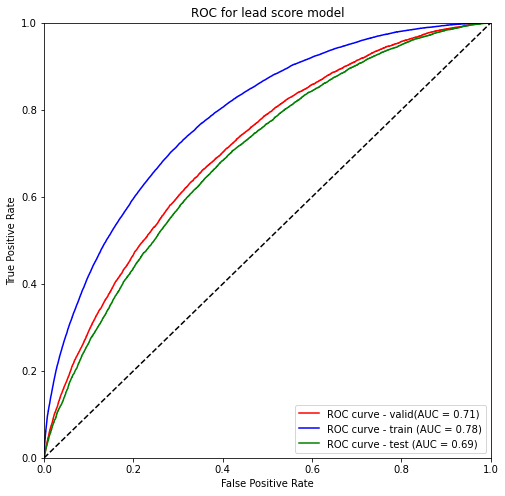

In [100]:
draw_ROC(gbm, dtrain, dvalid, dtest, Y_train,Y_valid,Y_test)

#### distribution of predicted values

In [101]:
y_pred=gbm.predict(dtest)

In [102]:
print (y_pred.max(),y_pred.min(),y_pred.mean())

0.7893423 0.006062867 0.1748661


### feature importance

In [103]:
importance=gbm.get_fscore()

In [104]:
df_importance=pd.DataFrame(importance.items(),columns=['feature', 'fscore'])
df_importance['fscore']=df_importance['fscore'] / df_importance['fscore'].sum()

In [105]:
df_importance.sort_values(['fscore'],ascending=False, inplace=True)
df_importance

,feature,fscore
12,dti,0.038560
26,installment,0.033896
16,emptitle_freq,0.032911
59,zipcode,0.030874
52,maxbalbc,0.027721
...,...,...
85,purpose_car,0.000197
66,pubrec,0.000197
94,chargeoffwithin12mths,0.000197
96,purpose_house,0.000066


<Figure size 2304x2304 with 0 Axes>

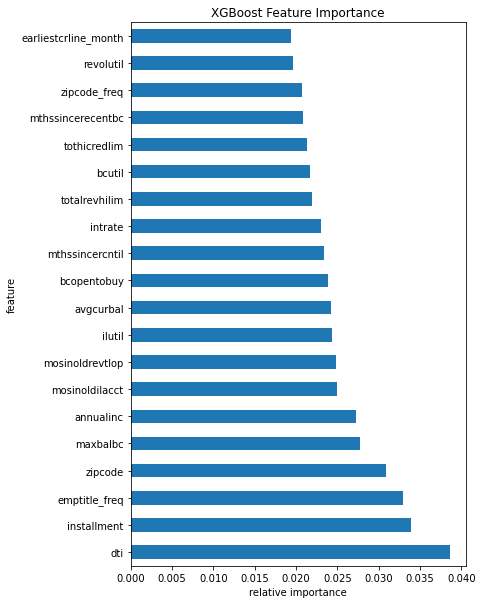

In [106]:
plt.figure(figsize=(32,32))
df_importance[:20].plot(kind='barh',x='feature',y='fscore',legend=False,figsize=(6,10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb_Xinrui.png')

In [107]:
grade_importance=df_importance.query("feature=='grade'")
grade_importance

,feature,fscore
1,grade,0.002562


In [108]:
subgrade_importance=df_importance.query("feature=='subgrade'")
subgrade_importance

,feature,fscore
2,subgrade,0.005978


In [109]:
intrate_importance=df_importance.query("feature=='intrate'")
intrate_importance

,feature,fscore
0,intrate,0.022992


In [110]:
df_importance.query("feature=='loanamnt'")

,feature,fscore
31,loanamnt,0.013532


Text(0.5, 0, 'relative importance')

<Figure size 2304x2304 with 0 Axes>

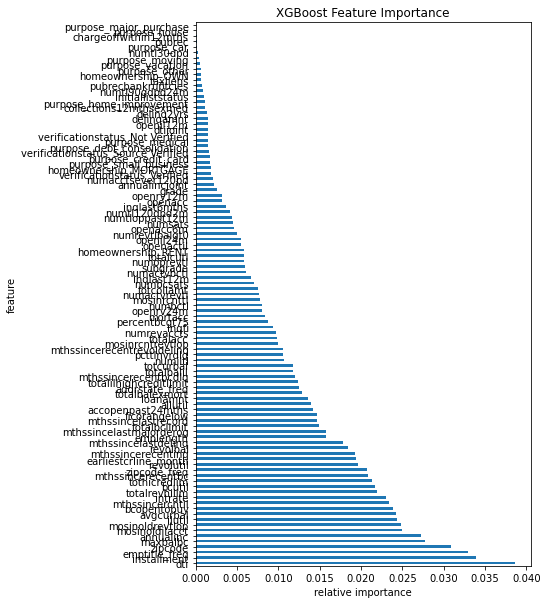

In [111]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

### Save model

In [112]:
import pickle
pickle.dump(gbm, open('model.pkl','wb'))

In [113]:
import joblib
joblib.dump(gbm,'pima.joblib.dat')

['pima.joblib.dat']

In [114]:
with open('model.pkl','wb') as outfile:
    pickle.dump(gbm,outfile)